In [151]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim

import re

In [152]:


# Informations de connexion à la base de données RDS
endpoint = 'database-datacoders.c3m48simgdzn.eu-west-3.rds.amazonaws.com'
username = 'admin'
password = 'dataCoders2024+'
database_name = 'db_datacoders'
port = 3306  # Le port par défaut pour MySQL est 3306

# Création de la connexion
conn = mysql.connector.connect(
    host=endpoint,
    user=username,
    passwd=password,
    database=database_name,
    port=port
)

# Création d'un curseur
cursor = conn.cursor()

# Exemple d'exécution d'une requête SQL
cursor.execute('''
               SELECT * 
               FROM user_info as ui
               LEFT JOIN login_user as lu USING (id_login_user)
               LEFT JOIN mentor_sujet as ms ON (lu.id_login_user = ms.id_mentor)
               LEFT JOIN mentorat as mt ON (mt.id_mentorat = ms.id_mentorat)
               LEFT JOIN sujet as sj ON (lu.id_login_user = sj.id_utilisateur_mentoret)
               LEFT JOIN calendrier as c ON (lu.id_login_user = c.id_utilisateur_mentoret)
               ''')
rows = cursor.fetchall()

# # Affichage des résultats
# for row in rows[:20]:
#     print(row)



column_names = [desc[0]+str(i) for desc, i in zip(cursor.description, range(len(cursor.description)))]
print(column_names)

# Création du DataFrame pandas avec noms de colonnes préfixés par les noms des tables
# column_names_prefixed = [f"{table}_{column}" if table else column for table, column in zip(table_names, column_names)]
df = pd.DataFrame(rows, columns=column_names)

# Fermeture du curseur et de la connexion
cursor.close()
conn.close()


# enregistrer au format parquet
df.to_parquet('user_info.parquet', index=False)

['id_login_user0', 'id_user_info1', 'prenom2', 'nom3', 'sexe4', 'age5', 'mentor6', 'lgbt7', 'handicap8', 'type_handicap9', 'niveau_professionnel10', 'categorie_socio_professionnelle11', 'nombre_de_participation12', 'id_mentorat13', 'email14', 'mot_de_passe15', 'created_at16', 'last_connection_at17', 'id_mentor18', 'id_mentorat19', 'id_mentorat20', 'type_mentorat21', 'id_sujet22', 'id_mentorat23', 'id_utilisateur_mentor24', 'id_utilisateur_mentoret25', 'sujet_du_mentorat26', 'created_at27', 'updated_at28', 'id_utilisateur_mentor29', 'id_utilisateur_mentoret30', 'id_mentorat31', 'created_at32', 'updated_at33']


In [153]:
df = pd.read_parquet(r'C:\Users\dimle\Documents\clone_repo\HackathonWCS\ML\user_info.parquet')

df

,id_login_user0,id_user_info1,prenom2,nom3,sexe4,age5,mentor6,lgbt7,handicap8,type_handicap9,niveau_professionnel10,categorie_socio_professionnelle11,nombre_de_participation12,id_mentorat13,email14,mot_de_passe15,created_at16,last_connection_at17,id_mentor18,id_mentorat19,id_mentorat20,type_mentorat21,id_sujet22,id_mentorat23,id_utilisateur_mentor24,id_utilisateur_mentoret25,sujet_du_mentorat26,created_at27,updated_at28,id_utilisateur_mentor29,id_utilisateur_mentoret30,id_mentorat31,created_at32,updated_at33
0,2798,0,Chris,Kate,Other,2000,0,Yes,1,moteur,chomage,None,NaN,NaN,chrisleshmale@gmail.com,qwerty,2024-07-04 14:16:28,2024-07-04 14:16:28,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1,1798,1798,Marvin,Harrison,Genderfluid,59,0,No,0,None,Actif,Employé,6.0,3.0,ebeck@example.org,f0qrKuOj@#,2024-07-04 14:15:33,2024-07-04 14:15:33,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaT,NaT,2285.0,1798.0,3.0,2024-07-04 14:15:58,2024-07-04 14:15:58
2,1799,1799,Tammy,Scott,Transgender Female,32,1,Yes,0,None,Jeune diplômé,Ouvrier,14.0,1.0,scotttyrone@example.net,+#*5NoVrev,2024-07-04 14:15:33,2024-07-04 14:15:33,1799.0,2.0,2.0,mentorat pour membre lgbt+,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
3,1800,1800,Adam,Bates,Genderqueer,23,1,No,1,Visuel,Senior,Agriculteur,13.0,3.0,turneremily@example.com,9u86M$WX%$,2024-07-04 14:15:33,2024-07-04 14:15:33,1800.0,4.0,4.0,mentorat pour jeune diplomé ou étudiant,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
4,1801,1801,Heather,Waters,Female,56,0,Yes,0,None,Senior,Sans activité professionnelle,13.0,3.0,kimberly26@example.org,6$z52bUw(q,2024-07-04 14:15:34,2024-07-04 14:15:34,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaT,NaT,2720.0,1801.0,5.0,2024-07-04 14:15:58,2024-07-04 14:15:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,2794,2794,Mark,Miller,Female,61,1,No,0,None,Senior,Artisan,15.0,5.0,kristin98@example.org,@Rj7VPfKo8,2024-07-04 14:15:57,2024-07-04 14:15:57,2794.0,5.0,5.0,mentorat interculturel,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1536,2795,2795,Christopher,Graves,Non_binary,53,0,No,1,Physique,Senior,Employé,14.0,1.0,farrelldennis@example.org,i8HohXL3^s,2024-07-04 14:15:57,2024-07-04 14:15:57,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaT,NaT,2103.0,2795.0,2.0,2024-07-04 14:15:58,2024-07-04 14:15:58
1537,2796,2796,Richard,Orozco,Intersex,39,1,Yes,1,Physique,Étudiant,Étudiant,20.0,4.0,hamptonlee@example.com,$a0^XZEpu4,2024-07-04 14:15:57,2024-07-04 14:15:57,2796.0,5.0,5.0,mentorat interculturel,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1538,2797,2797,Timothy,Scott,Non_binary,30,0,Yes,0,None,Jeune diplômé,Artisan,7.0,1.0,tcruz@example.org,!zTZtL0lq7,2024-07-04 14:15:57,2024-07-04 14:15:57,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaT,NaT,2036.0,2797.0,2.0,2024-07-04 14:15:58,2024-07-04 14:15:58


In [154]:
pd.set_option("display.max_columns", None)

In [155]:
# clean du df pour le ML
df.drop(columns=[
                 'id_user_info1', 
                 'prenom2',	
                 'nom3',	
                 'age5',
                 'nombre_de_participation12',	
                 'id_mentorat19',	
                 'email14',	
                 'mot_de_passe15',	
                 'created_at16'	,
                 'last_connection_at17',
                 'id_mentorat20',
                 'created_at27',	
                 'updated_at28',
                 'created_at32',	
                 'updated_at33',
                  'id_utilisateur_mentor29',	
                  'id_utilisateur_mentoret30',	
                  'id_mentorat31',
                  'id_mentorat23'	,
                  'id_utilisateur_mentor24',	
                  'sujet_du_mentorat26',
                  'id_utilisateur_mentoret25'
                  
                 ], inplace=True)

In [156]:
df

,id_login_user0,sexe4,mentor6,lgbt7,handicap8,type_handicap9,niveau_professionnel10,categorie_socio_professionnelle11,id_mentorat13,id_mentor18,type_mentorat21,id_sujet22
0,2798,Other,0,Yes,1,moteur,chomage,None,NaN,NaN,None,NaN
1,1798,Genderfluid,0,No,0,None,Actif,Employé,3.0,NaN,None,NaN
2,1799,Transgender Female,1,Yes,0,None,Jeune diplômé,Ouvrier,1.0,1799.0,mentorat pour membre lgbt+,NaN
3,1800,Genderqueer,1,No,1,Visuel,Senior,Agriculteur,3.0,1800.0,mentorat pour jeune diplomé ou étudiant,NaN
4,1801,Female,0,Yes,0,None,Senior,Sans activité professionnelle,3.0,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,2794,Female,1,No,0,None,Senior,Artisan,5.0,2794.0,mentorat interculturel,NaN
1536,2795,Non_binary,0,No,1,Physique,Senior,Employé,1.0,NaN,None,NaN
1537,2796,Intersex,1,Yes,1,Physique,Étudiant,Étudiant,4.0,2796.0,mentorat interculturel,NaN
1538,2797,Non_binary,0,Yes,0,None,Jeune diplômé,Artisan,1.0,NaN,None,NaN


In [157]:
# remplacement desq oui par Yes
df['lgbt7'] = df['lgbt7'].apply(lambda x: 0 if x =='No' else 1 )

In [158]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1540   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA    ┃ NA %   ┃ mean     ┃ sd      ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id_login_user0    │     0 │      0 │     2303 │   285.2 │  1798 │   2065 │  2294 │   2546 │  2798 │ ▇▇▇▇▇▇ │  │
│ │ mentor6           │     0 │      0 │   0.4481 │  0.4975 │     0 │      0 │     0 │      1 │     1 │ ▇    ▆ │  │
│ │ lgbt7             │     0 │      0 │   0.5045 │  0.5001 │     0 │      0 │     1 │      1 │     1 │ ▇    ▇ │  │
│ │ handicap8         │     0 │      0 │   0.5039 │  0.5001 │     0 │      0 │     1 │      1 │     1 │ ▇    ▇ │  │
│ │ id_mentorat13     │     1 │   0.06 │    2.992 │   1.415 │     1 │      2 │     3 │      4 │     5 │ ▇▇ ▇▇▇ │  │
│ │ id_mentor18       │  1040 │  67.53 │     2318 │   291.3 │  1799 │   2082 │  2308 │   2583 │  2796 │ ▆▆▇▆▇▇ │  │
│ │ id_sujet22        │  1086 │  70.52 │    152.6 │   87.25 │     1 │  78.25 │   155 │  227.8 │   300 │ ▇▇▆▇▇▇ │  │
│ └───────────────────┴───────┴────────┴──────────┴─────────┴───────┴────────┴───────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sexe4                               │        0 │          0 │                     1.2 │               1849 │  │
│ │ type_handicap9                      │      764 │      49.61 │                     0.5 │                776 │  │
│ │ niveau_professionnel10              │        0 │          0 │                     1.3 │               1934 │  │
│ │ categorie_socio_professionnelle11   │        1 │       0.06 │                     1.3 │               2001 │  │
│ │ type_mentorat21                     │     1040 │      67.53 │                     1.3 │               2001 │  │
│ └─────────────────────────────────────┴──────────┴────────────┴─────────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [159]:
# nettoyage des doublons
df = df[~df.duplicated()] 

In [160]:
# suppression NA pour id_login_user0

df = df.dropna(subset=['id_login_user0'])

In [161]:
# remplacement des NA pour les idmentor si mentor = false alors 99999

df['id_mentor18'] = df['id_mentor18'].fillna(99999)
df['id_mentorat13'] = df['id_mentorat13'].fillna(99999)
df['id_sujet22'] = df['id_sujet22'].fillna(99999)


In [162]:
df['type_handicap9'] = df['type_handicap9'].fillna('')
df['type_mentorat21'] = df['type_mentorat21'].fillna('')

In [163]:
# modification des totre de colonne pour sup le chiffre

df.rename(columns=lambda x: re.sub(r'\d+$', '', x),
          inplace=True)


In [164]:
# transformation des bool
df['lgbt'] = df['lgbt'].astype(bool)
df['mentor'] = df['mentor'].astype(bool)
df['handicap'] = df['handicap'].astype(bool)

In [165]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1208   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ bool        │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ id_login_user    │   0 │     0 │   2301 │  287.1 │  1798 │    2055 │    2298 │    2547 │    2798 │ ▇▇▇▇▇▇  │  │
│ │ id_mentorat      │   0 │     0 │  85.74 │   2877 │     1 │       2 │       3 │       4 │  100000 │    ▇    │  │
│ │ id_mentor        │   0 │     0 │  62560 │  47510 │  1799 │    2485 │  100000 │  100000 │  100000 │ ▅    ▇  │  │
│ │ id_sujet         │   0 │     0 │  75200 │  43160 │     1 │  100000 │  100000 │  100000 │  100000 │ ▃    ▇  │  │
│ └──────────────────┴─────┴───────┴────────┴────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ mentor                             │             653 │                          0.54 │       ▇    ▇        │  │
│ │ lgbt                               │             603 │                           0.5 │       ▇    ▇        │  │
│ │ handicap                           │             605 │                           0.5 │       ▇    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sexe                                  │     0 │         0 │                      1.2 │                1449 │  │
│ │ type_handicap                         │     0 │         0 │                        1 │                1208 │  │
│ │ niveau_professionnel                  │     0 │         0 │                      1.2 │                1510 │  │
│ │ categorie_socio_professionnelle       │     1 │     

In [166]:
df

,id_login_user,sexe,mentor,lgbt,handicap,type_handicap,niveau_professionnel,categorie_socio_professionnelle,id_mentorat,id_mentor,type_mentorat,id_sujet
0,2798,Other,False,True,True,moteur,chomage,None,99999.0,99999.0,,99999.0
1,1798,Genderfluid,False,False,False,,Actif,Employé,3.0,99999.0,,99999.0
2,1799,Transgender Female,True,True,False,,Jeune diplômé,Ouvrier,1.0,1799.0,mentorat pour membre lgbt+,99999.0
3,1800,Genderqueer,True,False,True,Visuel,Senior,Agriculteur,3.0,1800.0,mentorat pour jeune diplomé ou étudiant,99999.0
4,1801,Female,False,True,False,,Senior,Sans activité professionnelle,3.0,99999.0,,99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1534,2794,Female,True,False,False,,Senior,Artisan,5.0,2794.0,mentorat pour jeune diplomé ou étudiant,99999.0
1535,2794,Female,True,False,False,,Senior,Artisan,5.0,2794.0,mentorat interculturel,99999.0
1536,2795,Non_binary,False,False,True,Physique,Senior,Employé,1.0,99999.0,,99999.0
1537,2796,Intersex,True,True,True,Physique,Étudiant,Étudiant,4.0,2796.0,mentorat interculturel,99999.0


In [167]:
#observation des categorie

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric (object type)
        print(f"Value counts for column '{col}':")
        print(df[col].nunique())
        print()  # Print a new line for better readability



Value counts for column 'sexe':
10

Value counts for column 'type_handicap':
7

Value counts for column 'niveau_professionnel':
5

Value counts for column 'categorie_socio_professionnelle':
10

Value counts for column 'type_mentorat':
6



In [168]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric (object type)
        print(f"Value counts for column '{col}':")
        print(df[col].unique())
        print()

Value counts for column 'sexe':
['Other' 'Genderfluid' 'Transgender Female' 'Genderqueer' 'Female'
 'Non_binary' 'Male' 'Intersex' 'Agender' 'Transgender Male']

Value counts for column 'type_handicap':
['moteur' '' 'Visuel' 'Physique' 'Mental' 'Autre' 'Auditif']

Value counts for column 'niveau_professionnel':
['chomage' 'Actif' 'Jeune diplômé' 'Senior' 'Étudiant']

Value counts for column 'categorie_socio_professionnelle':
[None 'Employé' 'Ouvrier' 'Agriculteur' 'Sans activité professionnelle'
 'Retraité' 'Profession libérale' 'Commerçant' 'Cadre' 'Artisan'
 'Étudiant']

Value counts for column 'type_mentorat':
['' 'mentorat pour membre lgbt+' 'mentorat pour jeune diplomé ou étudiant'
 'mentorat pour person à handicape' 'mentorat pour femme'
 'mentorat interculturel']



In [169]:
dict_clean = {}


for col in df.columns:
    if df[col].dtype == 'object':
        dict_clean[col] = df[col].value_counts()

C:\Users\dimle\AppData\Local\Temp\ipykernel_26180\2644374535.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_26180\2644374535.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_26180\2644374535.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_26180\2644374535.py:12: UserWarning: set_ticklabels() should o

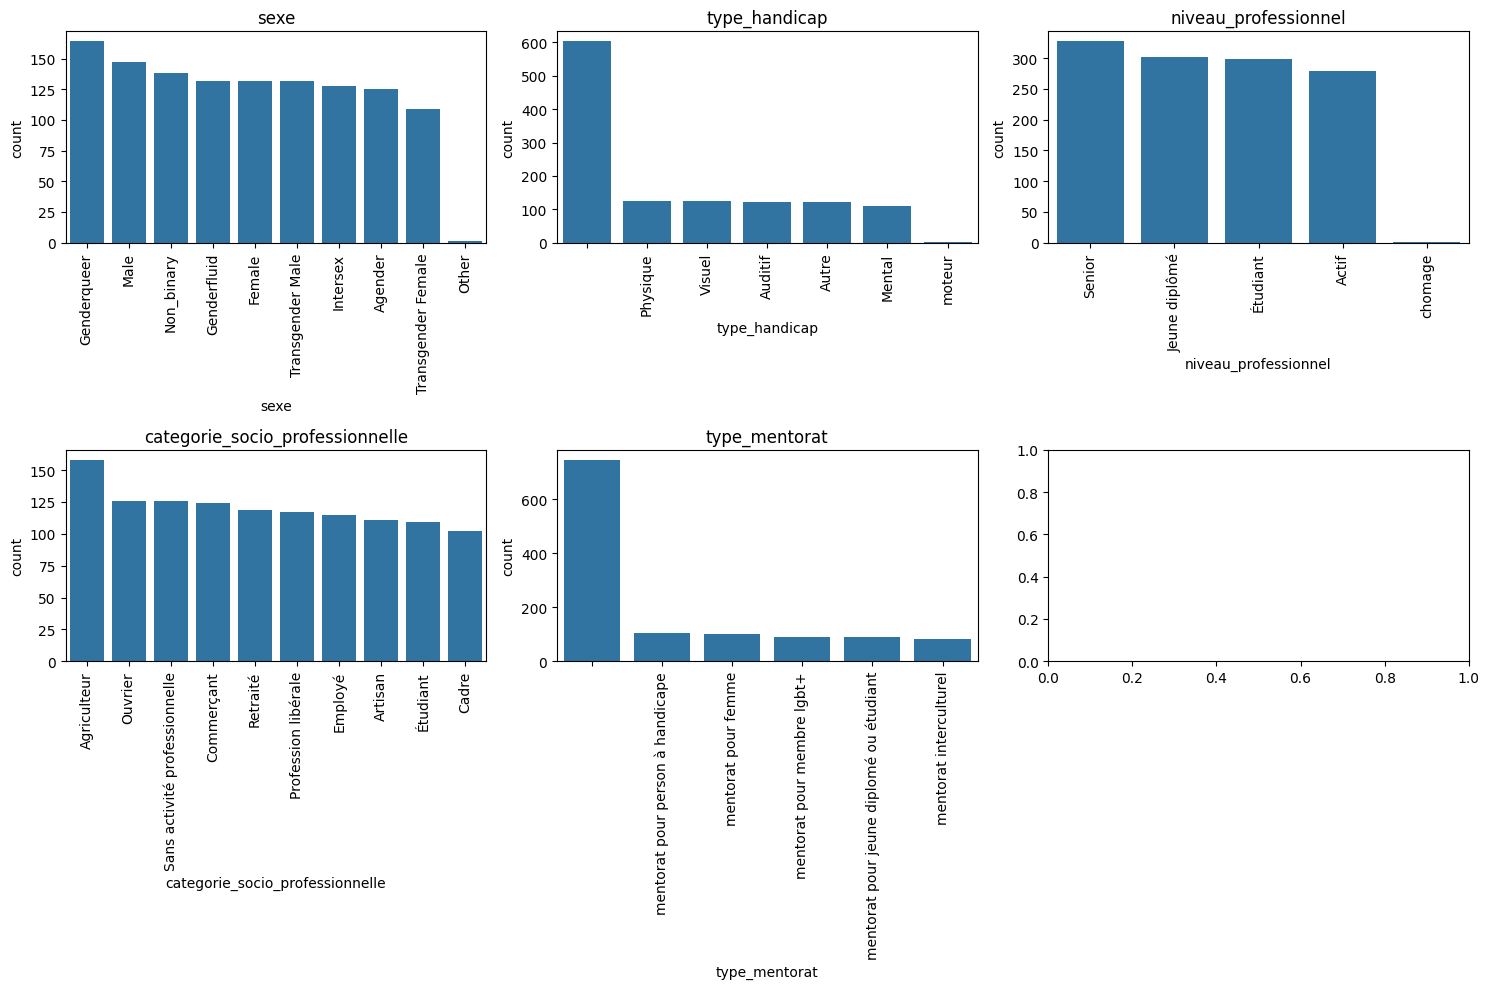

In [170]:
i= 0
nb_col = 3
nb_lig = 2
colonne = df.columns

fig, axes = plt.subplots(nb_lig, nb_col, figsize=(15,10))

for k, v in dict_clean.items():
    sns.barplot(dict_clean[k], ax= axes[i//nb_col, i%nb_col])
    axes[i//nb_col, i%nb_col].set_title(k)
    axes[i//nb_col, i%nb_col].set_ylabel('count')
    axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
    i += 1


plt.tight_layout()
plt.show()

In [171]:
df.select_dtypes(include='bool').columns

Index(['mentor', 'lgbt', 'handicap'], dtype='object')

In [172]:
df.select_dtypes(include=['object','number']).columns

Index(['id_login_user', 'sexe', 'type_handicap', 'niveau_professionnel',
       'categorie_socio_professionnelle', 'id_mentorat', 'id_mentor',
       'type_mentorat', 'id_sujet'],
      dtype='object')

In [173]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1208   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ bool        │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ id_login_user    │   0 │     0 │   2301 │  287.1 │  1798 │    2055 │    2298 │    2547 │    2798 │ ▇▇▇▇▇▇  │  │
│ │ id_mentorat      │   0 │     0 │  85.74 │   2877 │     1 │       2 │       3 │       4 │  100000 │    ▇    │  │
│ │ id_mentor        │   0 │     0 │  62560 │  47510 │  1799 │    2485 │  100000 │  100000 │  100000 │ ▅    ▇  │  │
│ │ id_sujet         │   0 │     0 │  75200 │  43160 │     1 │  100000 │  100000 │  100000 │  100000 │ ▃    ▇  │  │
│ └──────────────────┴─────┴───────┴────────┴────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ mentor                             │             653 │                          0.54 │       ▇    ▇        │  │
│ │ lgbt                               │             603 │                           0.5 │       ▇    ▇        │  │
│ │ handicap                           │             605 │                           0.5 │       ▇    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sexe                                  │     0 │         0 │                      1.2 │                1449 │  │
│ │ type_handicap                         │     0 │         0 │                        1 │                1208 │  │
│ │ niveau_professionnel                  │     0 │         0 │                      1.2 │                1510 │  │
│ │ categorie_socio_professionnelle       │     1 │     

In [174]:
# enregistrement du df clean en parquet
df.to_parquet('user_info_clean.parquet', index=False)